In [12]:
import numpy as np
import matplotlib.pyplot as plt


#LEFT, RIGHT = -3, 3 это границы интервала
# LEFT, RIGHT = -1, 1
LEFT, RIGHT = -0.5, 0.5
# это переменные для ограничения области видимости, графика

Y_LIM_UP, Y_LIM_DOWN = 1, -0.25
EPS = 0.5
"""
Здесь идут функции к которым все строится
"""
def F(x):
    return np.sin(x)

# def F1(x):
#     return 1 / (1 + (25 * x * x))

def F1(x):
    return abs

"""
Вычисление одного члена суммы Лагранжа
nodes: выборка по которой строится (т.е. узлы интерполяции)
i: номер узла
x: аргумент для вычисления члена в точке x 
"""
def multy(nodes, i, x=None):
    _res = 1.0
    for j in range(len(nodes)):
        if (i != j) and x is None:
            _res *= nodes[i] - nodes[j]
        elif (i != j):
            _res *= x - nodes[j]
    return _res

"""
Подсчет многочлена Лагранжа
х: точка в которой считаем
nodes выборка
my_func функция для которой строится многочлен
"""
def Lougerange(x, nodes, my_func):
    _sum = 0
    for i in range(len(nodes)):
        _sum += (multy(nodes, i, x) * my_func(nodes[i]) / multy(nodes, i))
    return _sum

In [13]:
def draw_plot(_fig, _ax, objs):
    nodes = objs[0]
    _ax.plot(nodes, list(map(lambda x: F(x), nodes)))

def filter_axis(nodes, my_func, snodes):
    return list(filter(lambda x: abs(my_func(x) - Lougerange(x, snodes, my_func)) <= EPS, nodes))

def draw_granitza(_fig, _ax, n, x):
    _ax.plot([x] * n, np.linspace(Y_LIM_DOWN, Y_LIM_UP, n), c='r')
    _ax.plot([-x] * n, np.linspace(Y_LIM_DOWN, Y_LIM_UP, n), c='r')

"""
Основная функция по рисовке
"""
def draw_diff(n, my_func, _fsize=(20, 9)):
    fig, ax = plt.subplots(figsize=_fsize)
    nodes = np.linspace(LEFT, RIGHT, n + 1)
    nodes_1 = np.linspace(LEFT, RIGHT, (2 * n + 1))

    ax.plot(nodes_1, list(map(lambda x: my_func(x), nodes_1)), color='r', 
                            linewidth=2, label='my_func')
                            
    ax.plot(nodes_1, list(map(lambda x: Lougerange(x, nodes, my_func), nodes_1)), 
                            '--', linewidth=2, label='интерполяция',
                            color='b')
    ax.plot(nodes_1, list(map(lambda x: Lougerange(x, nodes, my_func), nodes_1)), 'ro',
                             linewidth=6, color='m')
    new_nodes = filter_axis(nodes_1, my_func, nodes)
    print(len(new_nodes), len(nodes_1) , new_nodes, sep='\n')
    draw_granitza(fig, ax, 30, 0.65)
    ax.set_xlabel('x label') 
    ax.set_ylabel('y label')
    plt.grid()
    plt.ylim(Y_LIM_DOWN, Y_LIM_UP)
    plt.legend()
    plt.show()


def draw_graphics(n, _fsize=(20, 9), plot_settings=draw_plot):
    fig, ax = plt.subplots(figsize=_fsize)
    interpolation_nodes = np.linspace(LEFT, RIGHT, n)
    plot_settings(fig, ax, interpolation_nodes)
    ax.set_xlabel('x label') 
    ax.set_ylabel('y label')
    plt.grid()
    plt.show()
    plt.ylim()



In [14]:
def draw_graphics_sin():
    pass

def draw_graphics_p_x():
    pass

In [15]:
"""
По условию будет два параметра n, m 

n степень многочлена, т.е. узлов должно быть на один больше

При вычислении 
   многочлена Лагранжа у тебя пусть выборка размера n + 1 (число узлов)
   Тогда в функцию по вычисление тебе нужно засунуть выборку размером 2 * n + 1
   это на практике работает в теорию лезть не буду
   Вот + по заданию каждый интервал нужно будет разбить на m подинтервалов
   т.е узлов, если я не ошибся будет (n * m), соотвественно в функцию Лагранжа
   надо пихнуть выборку размером 2 * n * m + 1.

ax.plot() первым принимает в себя точки по оси х, другой по у, 
   чтобы были пунктиры и чисто точки рекомендую чекнуть доки 
   либо в коде увидеть как это делать.

когда получите график поиграйтесь со значениями узлов и параметра м
   чтобы понять сходиться ли многочлен или нет + рекомендую на это время 
   убрать ограничения по осям видимости у графика. Сразу будет видно 
   какие-то скачки, которые сильно отклоняются. Там многочлен будет 
   расходиться соотвественно, потом ручками посмотреть примерную границу 
   области сходимости, т.е. просто 2 вертикальные черты для ограничения 
   области провести. Можете по запускать этот код и все будет видно.
   При сдаче еще придется проговаривать ему, что и где у тебя на графике. 
"""

def main(n):
   #draw_graphics_sin()
   #draw_graphics_p_x()
   # draw_diff(n, F)
   draw_diff(n, F1)

TypeError: float() argument must be a string or a real number, not 'builtin_function_or_method'

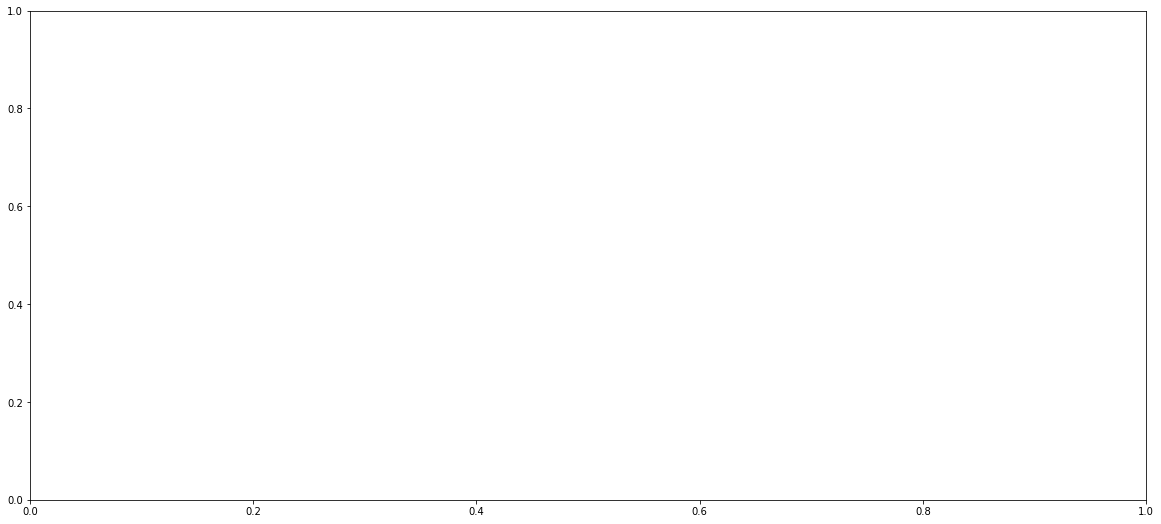

In [16]:
main(int(input()))